In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import seaborn as sns
sns.set()
import numpy as np
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.2)

In [2]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor")

#load data
df =  pd.read_csv('dfData.csv')

In [3]:
df

,userId,incrementalId,POIId,weekday,hour,minutes_spent,stop_type,name1_fs,name2_fs
0,0,1,NaN,4,0,1881.216667,home,NaN,NaN
1,0,2,NaN,5,8,40.400000,other,NaN,NaN
2,0,3,1.202591e+12,5,10,77.350000,poi,Shop & Service,Tailor Shop
3,0,4,NaN,5,11,376.450000,home,NaN,NaN
4,0,5,1.202591e+12,5,18,5.216667,poi,Shop & Service,Tailor Shop
...,...,...,...,...,...,...,...,...,...
20130765,403726927905,61,NaN,6,8,5.083333,home,NaN,NaN
20130766,403726927905,62,1.537598e+12,6,9,63.316667,poi,Professional & Other Places,School
20130767,403726927905,63,NaN,6,11,233.016667,home,NaN,NaN
20130768,403726927905,64,NaN,6,18,1609.166667,home,NaN,NaN


In [4]:
user = df['userId'].unique().tolist()

In [5]:
#minutes spent in total for each user
minutesTotal = df.groupby('userId').sum()['minutes_spent'].reset_index()

In [6]:
#minutes in the 2 months
Nmin = 60*24*60

In [7]:
#unexplained minutes(minutes, where it is not in the data where they are)
minutesTotal['unexplained_min'] = Nmin-minutesTotal['minutes_spent']

In [8]:
minutesTotal

,userId,minutes_spent,unexplained_min
0,0,80723.600000,5676.400000
1,1,70111.233333,16288.766667
2,2,35914.400000,50485.600000
3,3,61881.166667,24518.833333
4,4,69530.883333,16869.116667
...,...,...,...
93208,403726927888,116747.133333,-30347.133333
93209,403726927895,63875.033333,22524.966667
93210,403726927896,27596.716667,58803.283333
93211,403726927904,28803.783333,57596.216667


In [9]:
#negative values
negMin = minutesTotal[minutesTotal.unexplained_min < 0]

In [10]:
negMin

,userId,minutes_spent,unexplained_min
489,499,93003.333333,-6603.333333
812,827,93362.183333,-6962.183333
962,979,86610.133333,-210.133333
1118,1140,338261.866667,-251861.866667
1175,1199,88712.550000,-2312.550000
...,...,...,...
92671,403726927289,88178.100000,-1778.100000
92734,403726927354,109230.150000,-22830.150000
93150,403726927807,134408.416667,-48008.416667
93174,403726927834,110095.300000,-23695.300000


In [11]:
#list with the users to delete due to too many minutes in minutes_spent
userToDelete = negMin.userId.tolist()

In [12]:
#delete users with to many minutes from the data
data = df[~df.userId.isin(userToDelete)]

In [13]:
#Save the new filtering of the data
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor")
data.to_csv('data.csv', index=False)

In [14]:
#users for the data with the deleted users
user = data['userId'].unique().tolist()

In [15]:
data

,userId,incrementalId,POIId,weekday,hour,minutes_spent,stop_type,name1_fs,name2_fs
0,0,1,NaN,4,0,1881.216667,home,NaN,NaN
1,0,2,NaN,5,8,40.400000,other,NaN,NaN
2,0,3,1.202591e+12,5,10,77.350000,poi,Shop & Service,Tailor Shop
3,0,4,NaN,5,11,376.450000,home,NaN,NaN
4,0,5,1.202591e+12,5,18,5.216667,poi,Shop & Service,Tailor Shop
...,...,...,...,...,...,...,...,...,...
20130765,403726927905,61,NaN,6,8,5.083333,home,NaN,NaN
20130766,403726927905,62,1.537598e+12,6,9,63.316667,poi,Professional & Other Places,School
20130767,403726927905,63,NaN,6,11,233.016667,home,NaN,NaN
20130768,403726927905,64,NaN,6,18,1609.166667,home,NaN,NaN


In [16]:
#minutes spent in total for each user in the new filtered data
minutesTotal = data.groupby('userId').sum()['minutes_spent'].reset_index()

In [17]:
minutesTotal

,userId,minutes_spent
0,0,80723.600000
1,1,70111.233333
2,2,35914.400000
3,3,61881.166667
4,4,69530.883333
...,...,...
92719,403726927883,27184.033333
92720,403726927895,63875.033333
92721,403726927896,27596.716667
92722,403726927904,28803.783333


In [18]:
#unexplained minutes(minutes, where it is not in the data where they are) for the new filtered data
minutesTotal['unexplained_min'] = Nmin-minutesTotal['minutes_spent']

In [19]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

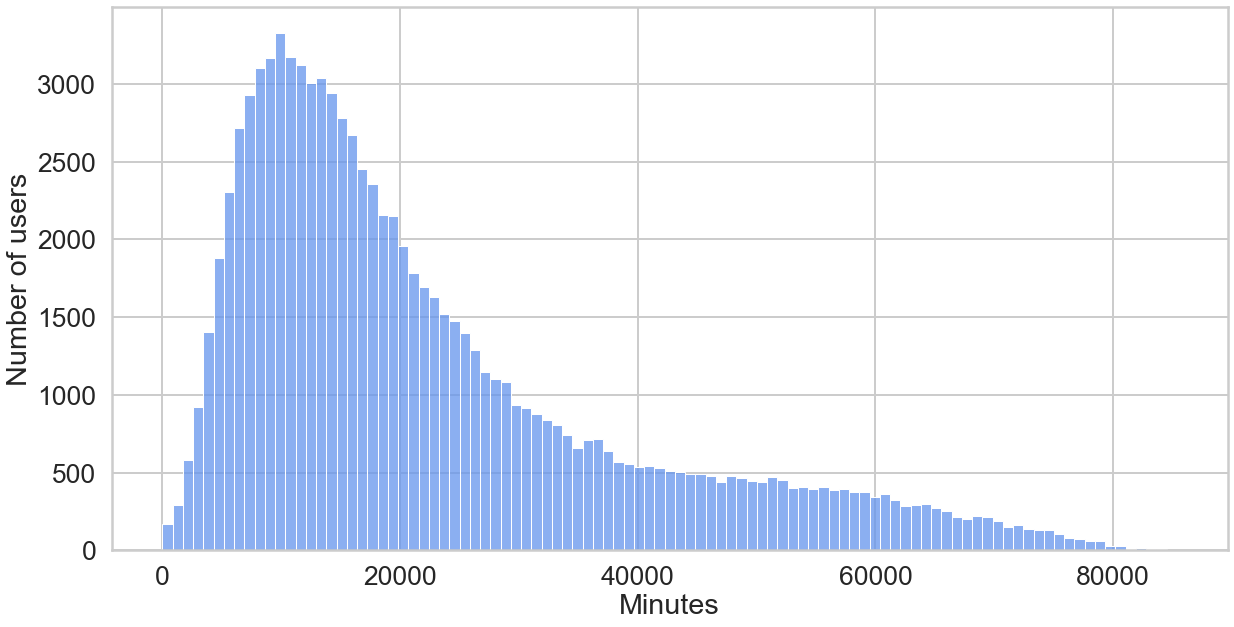

In [20]:
#minutes not explained
sns.histplot(data=minutesTotal['unexplained_min'], color='cornflowerblue')
plt.ylabel('Number of users')
plt.xlabel('Minutes')
plt.savefig('unexplainedMin.png', bbox_inches='tight') #Save plot
plt.show()

In [21]:
#25-quantile
minutesTotal['minutes_spent'].quantile(q=0.25)

56348.64583333331

In [22]:
#median
minutesTotal['minutes_spent'].median()

69021.97499999998

In [23]:
#75-quantile
minutesTotal['minutes_spent'].quantile(q=0.75)

75946.1875

In [24]:
#explained time - how much of the time is explained by stopping at home, work, other or POI
minutesTotal['explained_time'] = minutesTotal['minutes_spent']/Nmin

In [25]:
minutesTotal

,userId,minutes_spent,unexplained_min,explained_time
0,0,80723.600000,5676.400000,0.934301
1,1,70111.233333,16288.766667,0.811473
2,2,35914.400000,50485.600000,0.415676
3,3,61881.166667,24518.833333,0.716217
4,4,69530.883333,16869.116667,0.804756
...,...,...,...,...
92719,403726927883,27184.033333,59215.966667,0.314630
92720,403726927895,63875.033333,22524.966667,0.739294
92721,403726927896,27596.716667,58803.283333,0.319406
92722,403726927904,28803.783333,57596.216667,0.333377


In [26]:
min(minutesTotal['explained_time'])

0.011947337962962963

In [27]:
max(minutesTotal['explained_time'])

0.9999780092592596

In [28]:
#users with less than 2% explained
minutesTotal[minutesTotal.explained_time < 0.02]

,userId,minutes_spent,unexplained_min,explained_time
70697,309237646482,1314.366667,85085.633333,0.015213
80831,352187319935,1032.250000,85367.750000,0.011947


In [29]:
#users with more than 99% explained
minutesTotal[minutesTotal.explained_time > 0.99]

,userId,minutes_spent,unexplained_min,explained_time
199,202,86257.533333,142.466667,0.998351
1490,1532,85636.616667,763.383333,0.991165
1921,2019,85901.316667,498.683333,0.994228
3042,8589935731,86086.850000,313.150000,0.996376
3467,8589936167,86267.433333,132.566667,0.998466
...,...,...,...,...
90651,395136993103,86001.166667,398.833333,0.995384
90692,395136993158,85869.666667,530.333333,0.993862
91258,403726926331,85935.983333,464.016667,0.994629
92282,403726927389,86048.650000,351.350000,0.995933


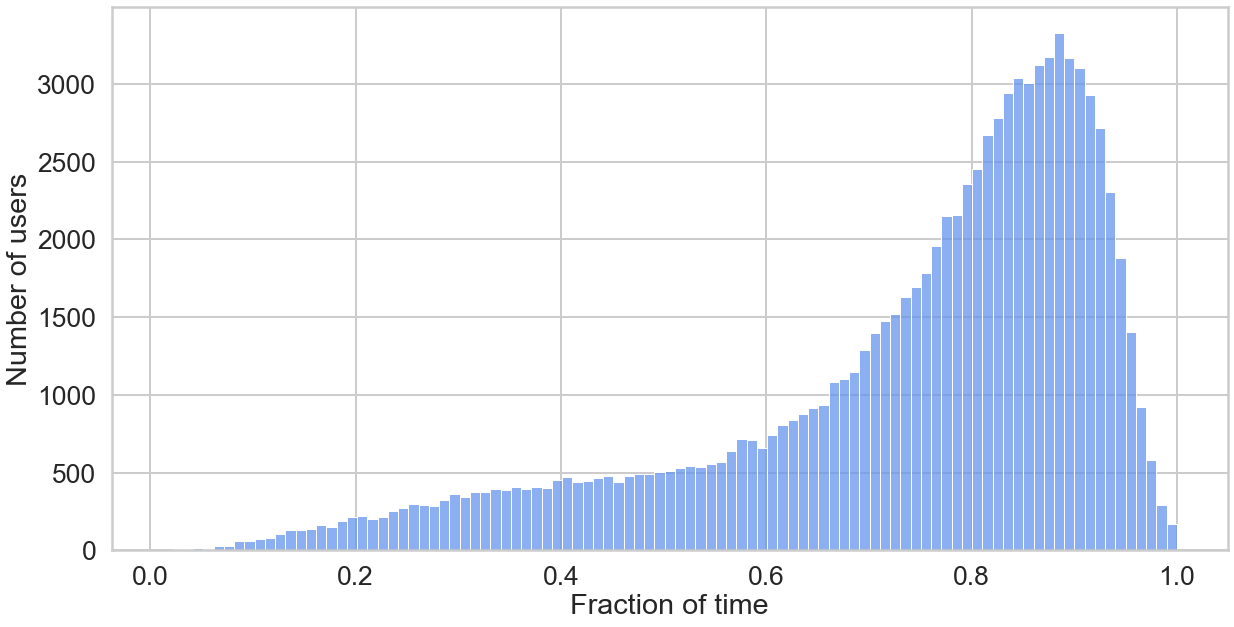

In [30]:
#Explained time
sns.histplot(data=minutesTotal['explained_time'], color='cornflowerblue')
plt.ylabel('Number of users')
plt.xlabel('Fraction of time')
plt.savefig('explainedMin.png', bbox_inches = 'tight') #Save plot
plt.show()

In [31]:
#25-quantile
minutesTotal['explained_time'].quantile(q=0.25)

0.6521834008487652

In [32]:
#median
minutesTotal['explained_time'].median()

0.7988654513888885

In [33]:
#75-quantile
minutesTotal['explained_time'].quantile(q=0.75)

0.8790067997685186

In [34]:
#number of minutes at stop categories
stopMinutes = data.groupby(['userId', 'stop_type']).sum()['minutes_spent'].unstack().fillna(0)

In [35]:
#minutes used at home, other, poi, work and in total
stopMinutes['total'] = stopMinutes.sum(axis=1)

In [36]:
stopMinutes

stop_type,home,other,poi,work,total
userId,,,,,
0,73997.416667,1275.850000,3095.300000,2355.033333,80723.600000
1,48088.700000,4947.666667,1363.366667,15711.500000,70111.233333
2,31875.783333,1753.916667,2284.700000,0.000000,35914.400000
3,39531.566667,4269.650000,11341.983333,6737.966667,61881.166667
4,52730.050000,1906.516667,13029.483333,1864.833333,69530.883333
...,...,...,...,...,...
403726927883,23563.100000,1864.933333,533.566667,1222.433333,27184.033333
403726927895,56771.533333,6202.850000,806.150000,94.500000,63875.033333
403726927896,19862.866667,1553.516667,1152.733333,5027.600000,27596.716667


In [37]:
#empty df for the average minutes spent on the stops
stopMinAvg = pd.DataFrame()

In [38]:
#number of stops at home, other, poi, work for each user
NStops = data.groupby(['userId', 'stop_type']).count()['incrementalId'].unstack().fillna(0)

In [39]:
NStops

stop_type,home,other,poi,work
userId,,,,
0,84.0,16.0,80.0,19.0
1,51.0,56.0,36.0,51.0
2,94.0,36.0,57.0,0.0
3,112.0,21.0,146.0,79.0
4,132.0,26.0,209.0,13.0
...,...,...,...,...
403726927883,61.0,32.0,15.0,25.0
403726927895,123.0,26.0,28.0,4.0
403726927896,54.0,18.0,3.0,9.0


In [40]:
#minutes in average
stopMinAvg['avg home_minutes'] = stopMinutes['home']/NStops['home'] #minutes spent at home in average = minutes spent at home / number of stops at home
stopMinAvg['avg work_minutes'] = stopMinutes['work']/NStops['work']
stopMinAvg['avg other_minutes'] = stopMinutes['other']/NStops['other']
stopMinAvg['avg POI_minutes'] = stopMinutes['poi']/NStops['poi']
stopMinAvg['avg total_minutes'] = stopMinutes['total']/NStops.sum(axis=1)

In [41]:
stopMinAvg

,avg home_minutes,avg work_minutes,avg other_minutes,avg POI_minutes,avg total_minutes
userId,,,,,
0,880.921627,123.949123,79.740625,38.691250,405.646231
1,942.915686,308.068627,88.351190,37.871296,361.398110
2,339.104078,NaN,48.719907,40.082456,192.055615
3,352.960417,85.290717,203.316667,77.684817,172.852421
4,399.470076,143.448718,73.327564,62.342026,182.976009
...,...,...,...,...,...
403726927883,386.280328,48.897333,58.279167,35.571111,204.391228
403726927895,461.557182,23.625000,238.571154,28.791071,352.900737
403726927896,367.830864,558.622222,86.306481,384.244444,328.532341


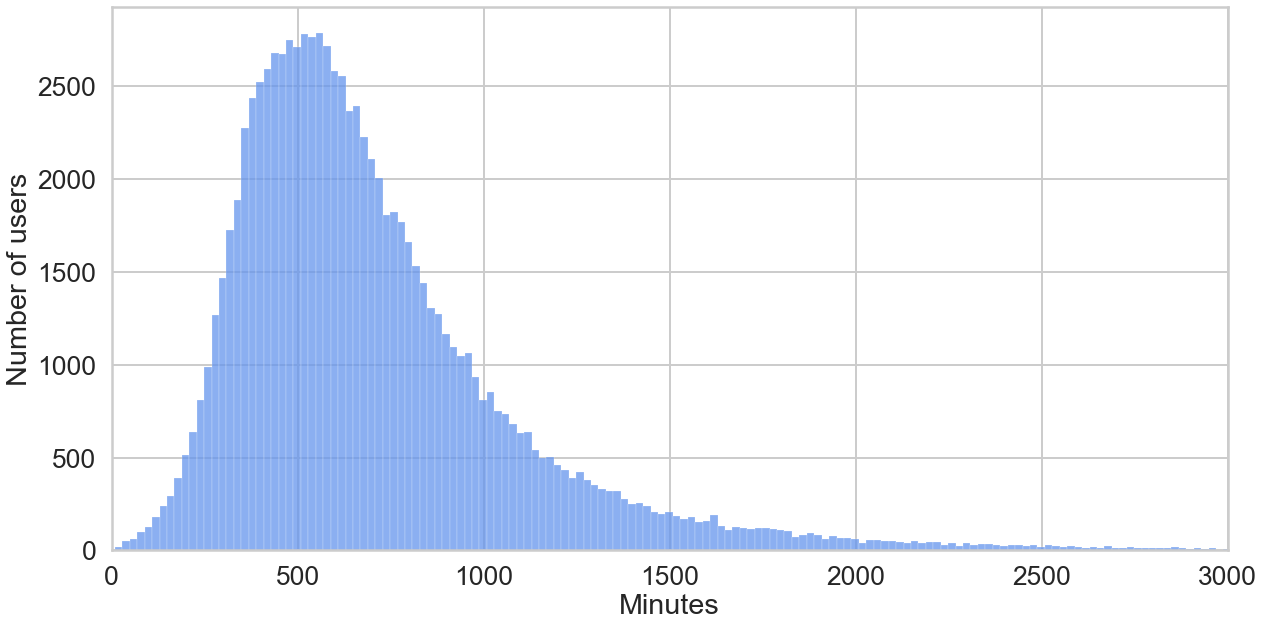

In [42]:
#Avg number of minutes at home
sns.histplot(data=stopMinAvg, x="avg home_minutes", binwidth = 20, color='cornflowerblue')
plt.ylabel('Number of users')
plt.xlabel('Minutes')
plt.xlim([0, 3000])
plt.savefig('HomeMinAvg.png', bbox_inches = 'tight') #Save plot
plt.show()

In [43]:
#25-quantile
stopMinAvg['avg home_minutes'].quantile(q=0.25)

447.6261774056412

In [44]:
#median
stopMinAvg['avg home_minutes'].median()

618.1940639269408

In [45]:
#75-quantile
stopMinAvg['avg home_minutes'].quantile(q=0.75)

859.3723974902794

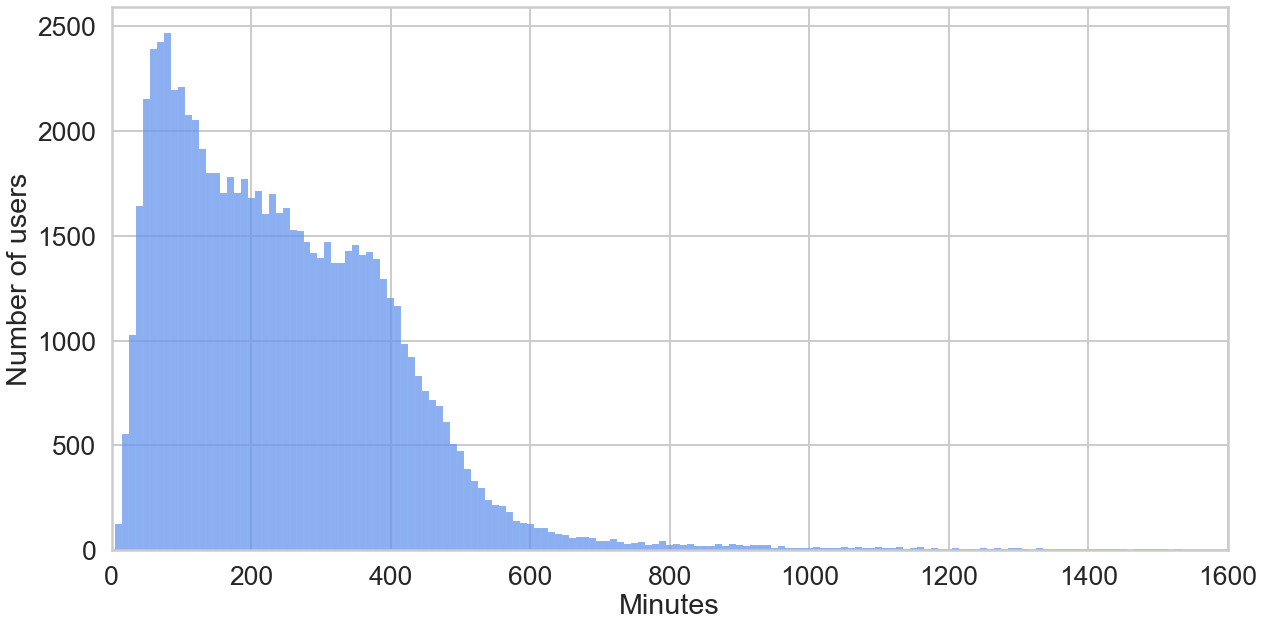

In [46]:
#Avg number of minutes at work
sns.histplot(data=stopMinAvg, x="avg work_minutes", binwidth = 10, color='cornflowerblue')
plt.ylabel('Number of users')
plt.xlabel('Minutes')
plt.xlim([0, 1600])
plt.savefig('WorkMinAvg.png', bbox_inches = 'tight') #Save plot
plt.show()

In [47]:
#25-quantile
stopMinAvg['avg work_minutes'].quantile(q=0.25)

115.02083333333336

In [48]:
#median
stopMinAvg['avg work_minutes'].median()

223.49846938775516

In [49]:
#75-quantile
stopMinAvg['avg work_minutes'].quantile(q=0.75)

352.5666666666666

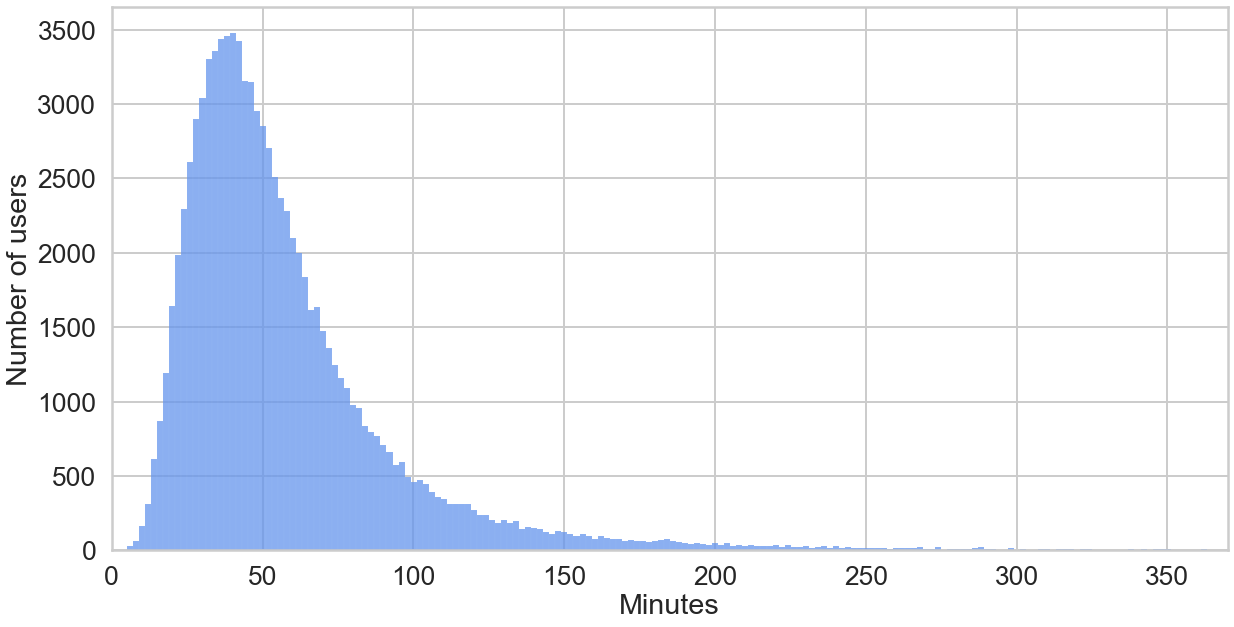

In [50]:
#Avg number of minutes at poi
sns.histplot(data=stopMinAvg, x="avg POI_minutes", binwidth = 2, color='cornflowerblue')
plt.ylabel('Number of users')
plt.xlabel('Minutes')
plt.xlim([0, 370])
plt.savefig('POIMinAvg.png', bbox_inches = 'tight') #Save plot
plt.show()

In [51]:
#25-quantile
stopMinAvg['avg POI_minutes'].quantile(q=0.25)

34.37976275787187

In [52]:
#median
stopMinAvg['avg POI_minutes'].median()

48.31666666666665

In [53]:
#75-quantile
stopMinAvg['avg POI_minutes'].quantile(q=0.75)

69.2443236714976

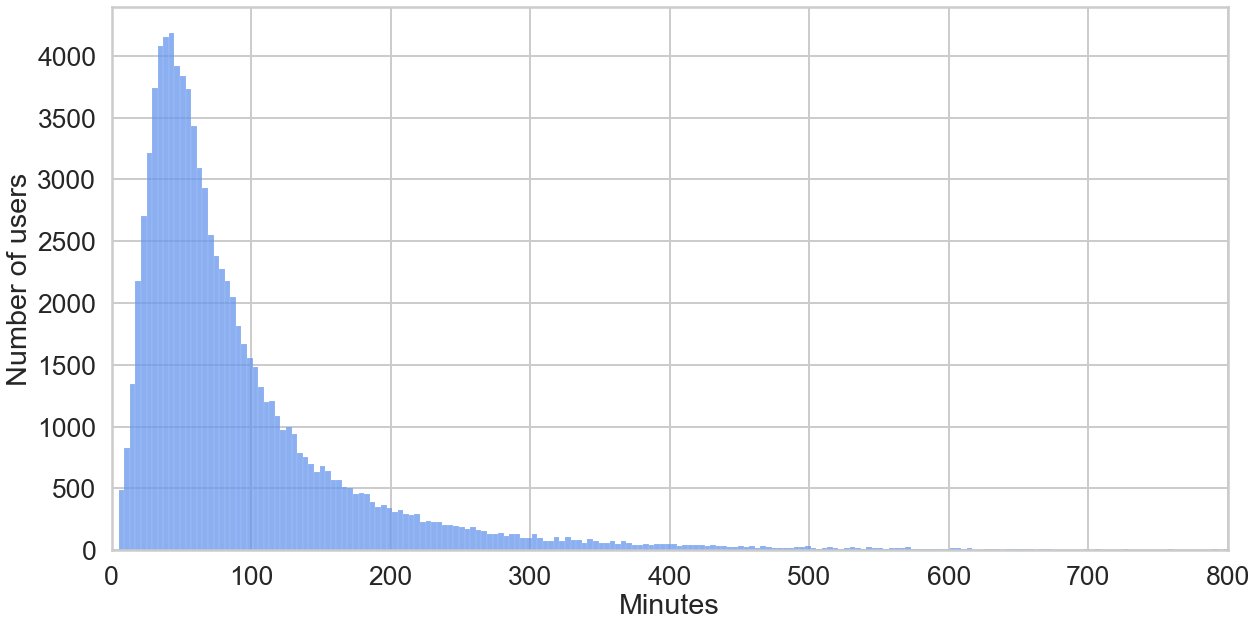

In [54]:
#Avg number of minutes at other
sns.histplot(data=stopMinAvg, x="avg other_minutes", binwidth = 4, color='cornflowerblue')
plt.ylabel('Number of users')
plt.xlabel('Minutes')
plt.xlim([0, 800])
plt.savefig('OtherMinAvg.png', bbox_inches = 'tight') #Save plot
plt.show()

In [55]:
#25-quantile
stopMinAvg['avg other_minutes'].quantile(q=0.25)

41.05693452380953

In [56]:
#median
stopMinAvg['avg other_minutes'].median()

65.85964947089948

In [57]:
#75-quantile
stopMinAvg['avg other_minutes'].quantile(q=0.75)

113.13097943722944

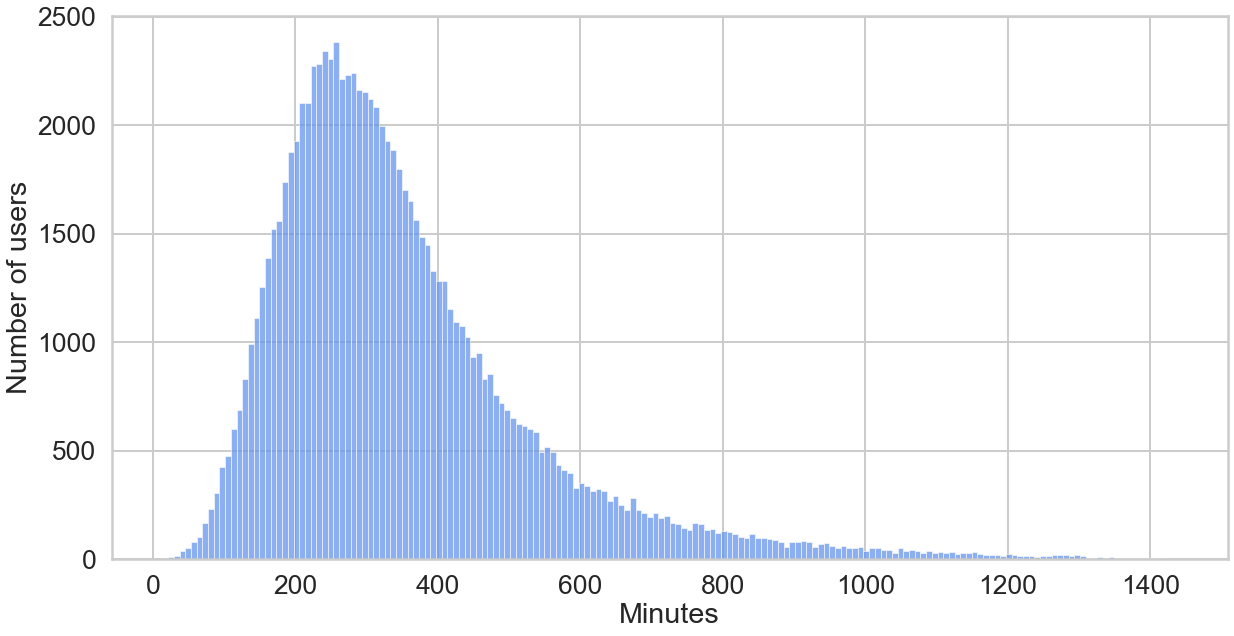

In [58]:
#Avg number of minutes in total
sns.histplot(data=stopMinAvg, x="avg total_minutes", binwidth = 8, color='cornflowerblue')
plt.ylabel('Number of users')
plt.xlabel('Minutes')
plt.savefig('TotalMinAvg.png', bbox_inches = 'tight') #Save plot
plt.show()

In [59]:
#25-quantile
stopMinAvg['avg total_minutes'].quantile(q=0.25)

227.07156244076586

In [60]:
#median
stopMinAvg['avg total_minutes'].median()

309.64349909887255

In [61]:
#75-quantile
stopMinAvg['avg total_minutes'].quantile(q=0.75)

426.27729822193254

In [62]:
StopCatExplain = pd.DataFrame()
StopCatExplain['home, work, poi'] = (stopMinutes['home']+stopMinutes['work']+stopMinutes['poi'])/Nmin

In [63]:
StopCatExplain['other'] = stopMinutes['other']/Nmin

In [64]:
StopCatExplain

,"home, work, poi",other
userId,,
0,0.919534,0.014767
1,0.754208,0.057265
2,0.395376,0.020300
3,0.666800,0.049417
4,0.782689,0.022066
...,...,...
403726927883,0.293045,0.021585
403726927895,0.667502,0.071792
403726927896,0.301426,0.017981


In [65]:
#Create colors
colors = ["#6495ED", "#C54E57"] #cornflower blue, dull red

In [66]:
#set color palette
sns.set_palette(sns.color_palette(colors))

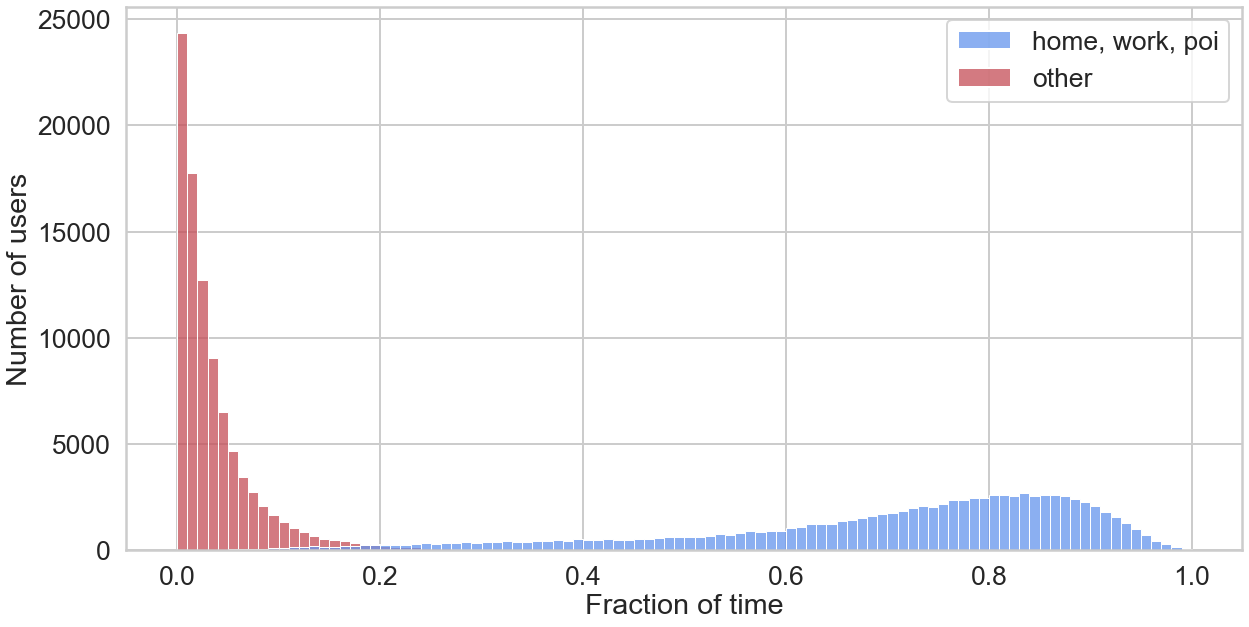

In [67]:
#explained time - home, work, poi vs. other. This is compared to the possible number of minutes(minutes in two months)
sns.histplot(data=StopCatExplain, binwidth = 0.01)
plt.ylabel('Number of users')
plt.xlabel('Fraction of time')
plt.savefig('explainedTimeCat.png', bbox_inches = 'tight') #Save plot
plt.show()

In [68]:
#25-quantile
print(StopCatExplain['home, work, poi'].quantile(q=0.25))
print(StopCatExplain['other'].quantile(q=0.25))

0.6028746624228394
0.009414448302469135


In [69]:
#median
print(StopCatExplain['home, work, poi'].median())
print(StopCatExplain['other'].median())

0.7515640432098765
0.02296421682098766


In [70]:
#75-quantile
print(StopCatExplain['home, work, poi'].quantile(q=0.75))
print(StopCatExplain['other'].quantile(q=0.75))

0.8449072145061729
0.048488040123456796


In [71]:
explainedCat = pd.DataFrame()

In [72]:
#how big a part of the explained time, that is home, work or POI
explainedCat['home, work, poi'] = (stopMinutes['home']+stopMinutes['work']+stopMinutes['poi'])/stopMinutes['total']

In [73]:
#how big a time of the explained time, that is other
explainedCat['other'] = stopMinutes['other']/stopMinutes['total']

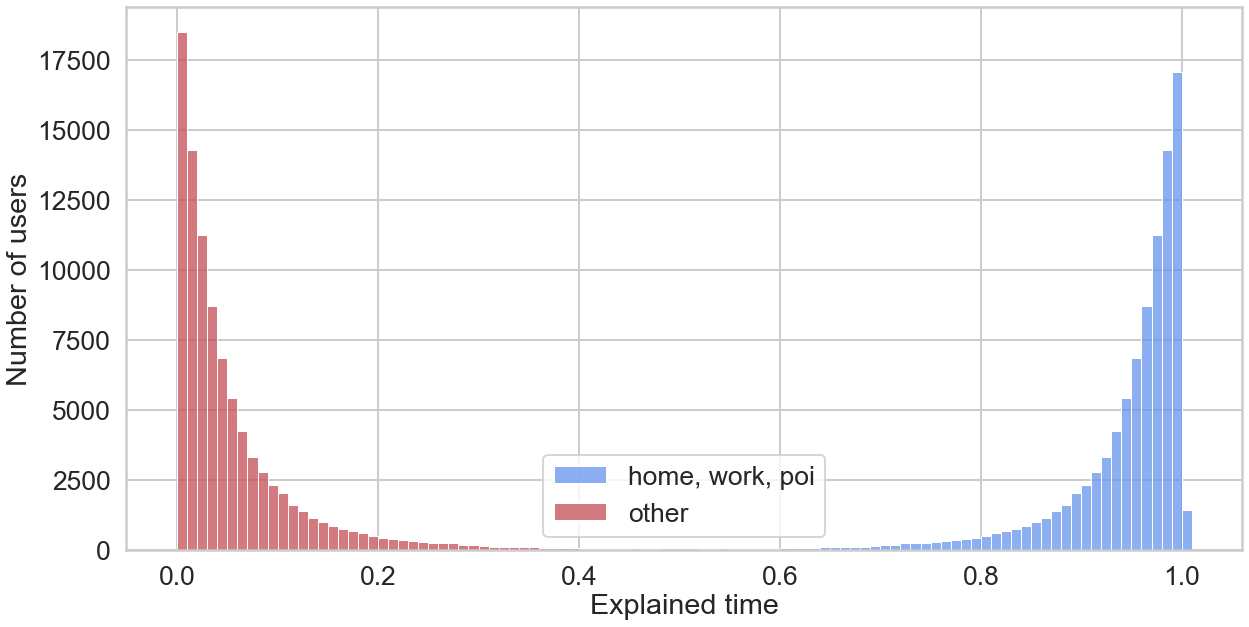

In [74]:
#home, work, poi vs. other. This is based on the explained number of minutes
sns.histplot(data=explainedCat, binwidth = 0.01)
#sns.histplot(data=StopCatExplain, x="other", binwidth = 0.01, color='red')
plt.ylabel('Number of users')
plt.xlabel('Explained time')
plt.show()

In [75]:
stopMinutes

stop_type,home,other,poi,work,total
userId,,,,,
0,73997.416667,1275.850000,3095.300000,2355.033333,80723.600000
1,48088.700000,4947.666667,1363.366667,15711.500000,70111.233333
2,31875.783333,1753.916667,2284.700000,0.000000,35914.400000
3,39531.566667,4269.650000,11341.983333,6737.966667,61881.166667
4,52730.050000,1906.516667,13029.483333,1864.833333,69530.883333
...,...,...,...,...,...
403726927883,23563.100000,1864.933333,533.566667,1222.433333,27184.033333
403726927895,56771.533333,6202.850000,806.150000,94.500000,63875.033333
403726927896,19862.866667,1553.516667,1152.733333,5027.600000,27596.716667


In [76]:
#min and max minutes in total
print("min:")
print(min(stopMinutes['home']))
print(min(stopMinutes['work']))
print(min(stopMinutes['poi']))
print(min(stopMinutes['other']))
print(min(stopMinutes['total']))

print("max:")
print(max(stopMinutes['home']))
print(max(stopMinutes['work']))
print(max(stopMinutes['poi']))
print(max(stopMinutes['other']))
print(max(stopMinutes['total']))

min:
0.0
0.0
0.0
0.0
1032.2500000000002
max:
86314.30000000003
61740.43333333335
38574.64999999998
51793.966666666645
86398.1


In [77]:
#position of min and max
print("min:")
print(np.argmin(stopMinutes['home']))
print(np.argmin(stopMinutes['work']))
print(np.argmin(stopMinutes['poi']))
print(np.argmin(stopMinutes['other']))
print(np.argmin(stopMinutes['total']))

print("max:")
print(np.argmax(stopMinutes['home']))
print(np.argmax(stopMinutes['work']))
print(np.argmax(stopMinutes['poi']))
print(np.argmax(stopMinutes['other']))
print(np.argmax(stopMinutes['total']))

min:
965
2
1082
220
80831
max:
11547
70540
49212
62514
18505


In [78]:
#min and max in average
print("min:")
print(min(stopMinAvg['avg home_minutes']))
print(min(stopMinAvg['avg work_minutes']))
print(min(stopMinAvg['avg POI_minutes']))
print(min(stopMinAvg['avg other_minutes']))
print(min(stopMinAvg['avg total_minutes']))

print("max:")
print(max(stopMinAvg['avg home_minutes']))
print(max(stopMinAvg['avg work_minutes']))
print(max(stopMinAvg['avg POI_minutes']))
print(max(stopMinAvg['avg other_minutes']))
print(max(stopMinAvg['avg total_minutes']))

min:
8.508333333333335
5.0
5.1
5.0
13.405844155844159
max:
10180.663888888888
21200.1
5974.766666666666
4058.9333333333334
1433.7713888888895
